## Install and import necessary packages

In [5]:
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [2]:
## Needed librarys
import tsfel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn import set_config
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif, chi2 
from sklearn import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, plot_precision_recall_curve, roc_curve, auc, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Import dataset

In [10]:
df=pd.read_excel(r'C:\Users\emhm\source\repos\ML viz\ML viz\AEPrec_sABRe_data_TP8sABR_BILATERAL_2021-Jun-24_14.59.57_MOD_OK.xlsx', sheet_name='L500dBnHL55', index_col=0)
dft=df.transpose()
dft.drop(['cond_wa (nV)','rare_wa (nV)', 'Fmp_win (msec)', 'Fmp', 'p', 'nSweeps', 'RN (nV)', 'Display filter', 'Nominal rate (Hz)', 'Jitter distribution', 'Jitter degree', 'wave V peak (msec, nV)', 'wave V trough (msec, nV)', 'Condition', 'ABR wave V latency (msec)', 'ABR wave V amplitude (nV)'], inplace=True, axis=1)
dft=dft.loc[:, dft.columns.notna()]
dft

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\emhm\\source\\repos\\ML viz\\ML viz\\AEPrec_sABRe_data_TP8sABR_BILATERAL_2021-Jun-24_14.59.57_MOD_OK.xlsx'

<function matplotlib.pyplot.show(close=None, block=None)>

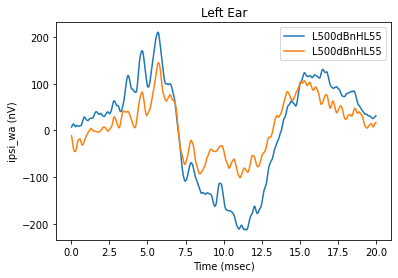

In [42]:
plt.plot(dft, label='L500dBnHL55')
plt.xlabel('Time (msec)')
plt.ylabel('ipsi_wa (nV)')
plt.title('Left Ear')
plt.legend()
plt.show

## Feature extraction using TSFEL package

In [43]:
cfg = tsfel.get_features_by_domain()

feature_mitdb = tsfel.time_series_features_extractor(cfg, dft, fs=150)

*** Feature extraction started ***
60



*** Feature extraction finished ***


In [44]:
feature_mitdb

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,1_Wavelet variance_0,1_Wavelet variance_1,1_Wavelet variance_2,1_Wavelet variance_3,1_Wavelet variance_4,1_Wavelet variance_5,1_Wavelet variance_6,1_Wavelet variance_7,1_Wavelet variance_8,1_Zero crossing rate
0,1.154231e+07,607.053144,1.154231e+07,3.300823,192.0,768.0,-125.03273,99.672813,0.001042,0.002083,...,1.004456,20.097681,103.552602,302.552088,647.364699,1138.622882,1756.514774,2470.165849,3238.516706,7.0


### Save the extracted features in a CSV file. This will save your time next time :)

In [23]:
feature_mitdb.to_csv("feature_mitdb.csv")

#### Once you have saved the extracted features, you only need to import them in future and skip the feature extraction. This way life will be easier :)

In [31]:
feature_mitdb = pd.read_csv('feature_mitdb.csv', header='infer')

## Feature Selection

In [11]:

df=pd.read_excel(r'C:\Users\emilh\Desktop\Data_split\AEPrec_sABRe_data_TP1sABR_BILATERAL_2021-Jun-07_10.12.10_MOD_OK.xlsxL2000dBnHL45.xlsx', index_col=0)
#df=df.filter(items=[1], axis=1)
dft=df.transpose()
dft=dft.drop(['cond_wa (nV)','rare_wa (nV)', 'Fmp_win (msec)', 'Fmp', 'p', 'nSweeps', 'RN (nV)', 'Display filter', 'Nominal rate (Hz)', 'Jitter distribution', 'Jitter degree', 'wave V peak (msec, nV)', 'wave V trough (msec, nV)', 'Condition', 'ABR wave V latency (msec)', 'ABR wave V amplitude (nV)'], inplace=True, axis=1)
dft
#dft.to_excel("feature_mitdb.xlsx")

In [38]:
path=r'C:\Users\emilh\Desktop\Data_split'
allfiles=glob.glob(path+"/*.xlsx")
all_data=pd.DataFrame()

file_list=[]

for files_ in allfiles:
    df=pd.read_excel(files_, index_col=0)
    dft=df.transpose()
    dft1=dft.drop(['cond_wa (nV)','rare_wa (nV)', 'Fmp_win (msec)', 'Fmp', 'p', 'nSweeps', 'RN (nV)', 'Display filter', 'Nominal rate (Hz)', 'Jitter distribution', 'Jitter degree', 'wave V peak (msec, nV)', 'wave V trough (msec, nV)', 'Condition', 'ABR wave V latency (msec)', 'ABR wave V amplitude (nV)'], inplace=True, axis=1)
    file=all_data.append(dft1, ignore_index=True)
all_data.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>

In [20]:
path=r'C:\Users\emilh\Desktop\Data_split'
allfiles=glob.glob(path+"/*.xlsx")
all_data=pd.DataFrame()

for files_ in allfiles:
    df=pd.read_excel(files_)
    all_data=all_data.append(df, ignore_index=True)

all_data.head

<bound method NDFrame.head of                     Time (msec) 0.020833333333333332  0.041666666666666664  \
0                  ipsi_wa (nV)            -1.791462             -2.400202   
1                  cond_wa (nV)               7.6651              8.921480   
2                  rare_wa (nV)           -10.064176            -12.162039   
3                contra_wa (nV)            -4.124032             -5.075283   
4                           NaN                  NaN                   NaN   
...                         ...                  ...                   ...   
3195     wave V peak (msec, nV)             5.520833            245.001068   
3196   wave V trough (msec, nV)                9.125           -166.141891   
3197                  Condition          conABRdis10                   NaN   
3198  ABR wave V latency (msec)             5.520833                   NaN   
3199  ABR wave V amplitude (nV)            411.14296                   NaN   

             0.0625  0.0833333333

In [15]:
path=r'C:\Users\emilh\Desktop\Data_split'
allfiles=glob.glob(path+"/*.xlsx")

list = []
for file_ in allfiles:
    dft=pd.read_excel(file_, index_col=None)
    dft=dft.transpose()
    dft.drop(['cond_wa (nV)','rare_wa (nV)', 'Fmp_win (msec)', 'Fmp', 'p', 'nSweeps', 'RN (nV)', 'Display filter', 'Nominal rate (Hz)', 'Jitter distribution', 'Jitter degree', 'wave V peak (msec, nV)', 'wave V trough (msec, nV)', 'Condition', 'ABR wave V latency (msec)', 'ABR wave V amplitude (nV)'], inplace=True, axis=1)
    dft=dft.loc[:, dft.columns.notna()]

    df['final_data']=file_
    df.index(len(df))

    index_start=df[df.iloc[:,0]=='ipsi_wa (nV)'].index.values.astype(float)

KeyError: "['cond_wa (nV)' 'rare_wa (nV)' 'Fmp_win (msec)' 'Fmp' 'p' 'nSweeps'\n 'RN (nV)' 'Display filter' 'Nominal rate (Hz)' 'Jitter distribution'\n 'Jitter degree' 'wave V peak (msec, nV)' 'wave V trough (msec, nV)'\n 'Condition' 'ABR wave V latency (msec)' 'ABR wave V amplitude (nV)'] not found in axis"

In [32]:
y=dft.loc[:, 'ipsi_wa (nV)']
X=dft.drop('ipsi_wa (nV)', axis=1)
print("Target variable:\n", y)
print("Predictive features:\n", X)
y.value_counts()

Target variable:
 0.020833      7.217339
0.041667      8.781087
0.062500     10.215491
0.083333     11.599972
0.104167     12.816255
               ...    
19.916667    28.773983
19.937500    29.527588
19.958333    30.286467
19.979167    30.911253
20.000000    31.255436
Name: ipsi_wa (nV), Length: 960, dtype: object
Predictive features:
 Time (msec) contra_wa (nV)
0.020833        -11.327547
0.041667         -15.45183
0.062500        -20.259748
0.083333        -25.537067
0.104167        -30.797749
...                    ...
19.916667        13.993834
19.937500        15.233068
19.958333         16.03651
19.979167        16.489119
20.000000         16.68643

[960 rows x 1 columns]


 7.217339     1
 8.781087     1
-61.653622    1
-59.663967    1
-56.998756    1
             ..
 67.928810    1
 64.058456    1
 59.374973    1
 53.937763    1
 31.255436    1
Name: ipsi_wa (nV), Length: 960, dtype: int64

In [26]:
#set_config(display="diagram")

X, y = make_classification(
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

anova_filter=SelectKBest(f_classif, k=3)
clf=LinearSVC()
anova_svm=make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

y_pred=anova_svm.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [36]:
threshold=20
skb=SelectKBest(score_func=chi2, k=threshold)
sel_skb=skb.fit(feature_mitdb)
sel_skb_index=sel_skb.get_support()
feature_mitdb_skb=feature_mitdb.iloc[:, sel_skb_index]
print('p-values', sel_skb.pvalues_)
print(feature_mitdb_skb.columns)

TypeError: fit() missing 1 required positional argument: 'y'

## Accuracy Functions

### Confussion matrix

In [ ]:
def get_confusion_matrix(y, y_pred, model):
    conf_matrix=confusion_matrix(y, y_pred)
    # Mangler nedenstående 
    df_cm = pd.DataFrame(conf_matrix,index = ['Alive','Dead'], columns = ['Alive','Dead'])
    sns.set(font_scale = 1.4)
    sns.heatmap(df_cm, annot = True, cmap = 'OrRd', fmt = 'g', annot_kws={"size": 16}) # font size
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.title('%s - Confusion Matrix' %model)
    #plt.savefig('confusion_matrix.png', dpi = 100, bbox_inches='tight' )
    plt.show()
    plt.close()

    return conf_matrix

def get_confusion_matrix(y, y_pred, model):
    conf_matrix=confusion_matrix(y, y_pred)
    # Mangler nedenstående 
    df_cm = pd.DataFrame(conf_matrix,index = ['Alive','Dead'], columns = ['Alive','Dead'])
    sns.set(font_scale = 1.4)
    sns.heatmap(df_cm, annot = True, cmap = 'OrRd', fmt = 'g', annot_kws={"size": 16}) # font size
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.title('%s - Confusion Matrix' %model)
    #plt.savefig('confusion_matrix.png', dpi = 100, bbox_inches='tight' )
    plt.show()
    plt.close()

    return conf_matrix

In [ ]:
# Based on Sensitivity and Recall 
# https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7
def get_matthews_corrcoef(y_pred, y_true):
    cov = np.cov(y_true, y_pred)
    if cov[0,0]==0. or cov[1,1]==0.:
        return 0.
    else:
        return cov[0,1]/np.sqrt(cov[0,0]*cov[1,1]) 
    
    
# Precision-Recall curve to evaluate a model
# PR curves are specifically tailored for the detection of rare events
def get_precision_recall_curve(y_true, y_pred):
    #precision, recall, thresholds = precision_recall_curve(y_test, probs)
    return plot_precision_recall_curve(classifier, X_test, y_test)
  
    
    
# ROC curves can sometimes be misleading in some very imbalanced applications
def get_roc_curve(y_true, y_pred_proba, model):
    
    #keep probabilities for the positive outcome only
    y_pred_proba = y_pred_proba[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    auc = roc_auc_score(y_true, y_pred_proba)
    print('ROC AUC=%.3f' % (auc))
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 0.8,color = 'black', label='Luck')
    plt.plot(fpr, tpr, marker='.', lw=2, color='red', label=r'ROC (AUC = %0.3f )' % (auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(r'%s - ROC curve' % (model))
    plt.legend(loc = 'lower right')
    plt.show()
    
    return auc

## Randomforrest classsifer

In [ ]:
# Step1: Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
OUTPUT: 0.756
    
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
OUTPUT: 0.797
    
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
OUTPUT:0.833
    
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
